In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Credit Card Customer Data.csv')
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
data.isnull().sum()


,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [6]:
data.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

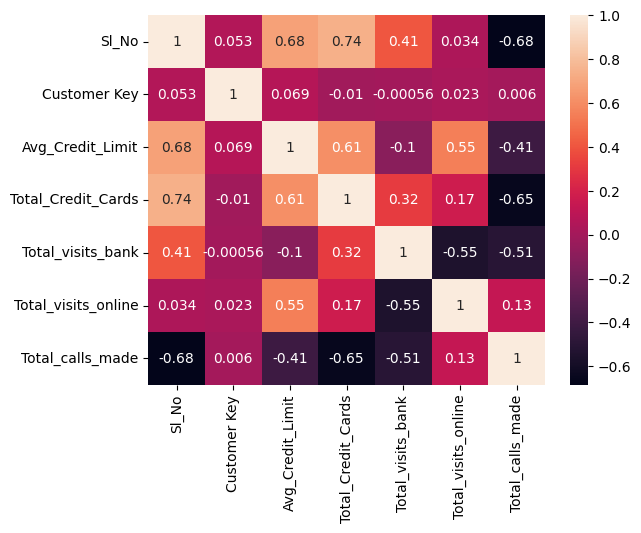

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
x = data.iloc[:,[2,3]]
x

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6
...,...,...
655,99000,10
656,84000,10
657,145000,8
658,172000,10


In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.74018685, -1.24922476],
       [ 0.41029254, -0.78758515],
       [ 0.41029254,  1.05897329],
       ...,
       [ 2.93709172,  1.5206129 ],
       [ 3.65523464,  2.44389211],
       [ 3.52224521,  1.9822525 ]])

Elbow Method

Untuk menentukan jumlah K yang optimal.

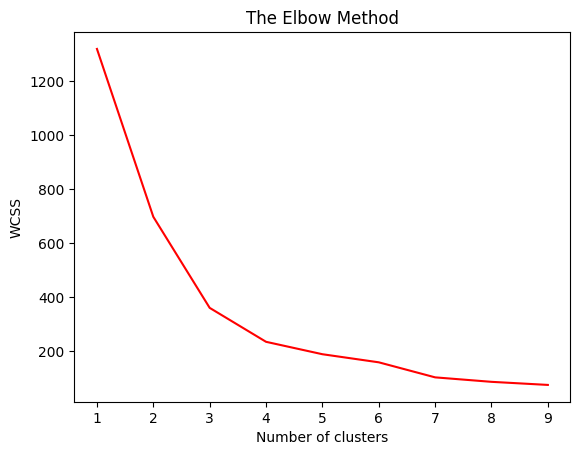

In [10]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Modelling

In [11]:
from sklearn.cluster import KMeans

# menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(x)

# mendapatkan cluster labels
labels = kmeans.predict(x)

# mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

In [12]:
centroids

array([[-0.58479899, -1.25965729],
       [-0.08372948,  0.29950167],
       [ 2.85404118,  1.89746156]])

In [13]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)
y_kmeans

array([2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
pred = y_kmeans
data['Cluster'] = pred
data['Cluster'].value_counts()

,count
Cluster,
0,434
2,177
1,49


In [15]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(x, labels)

0.4678177195091511

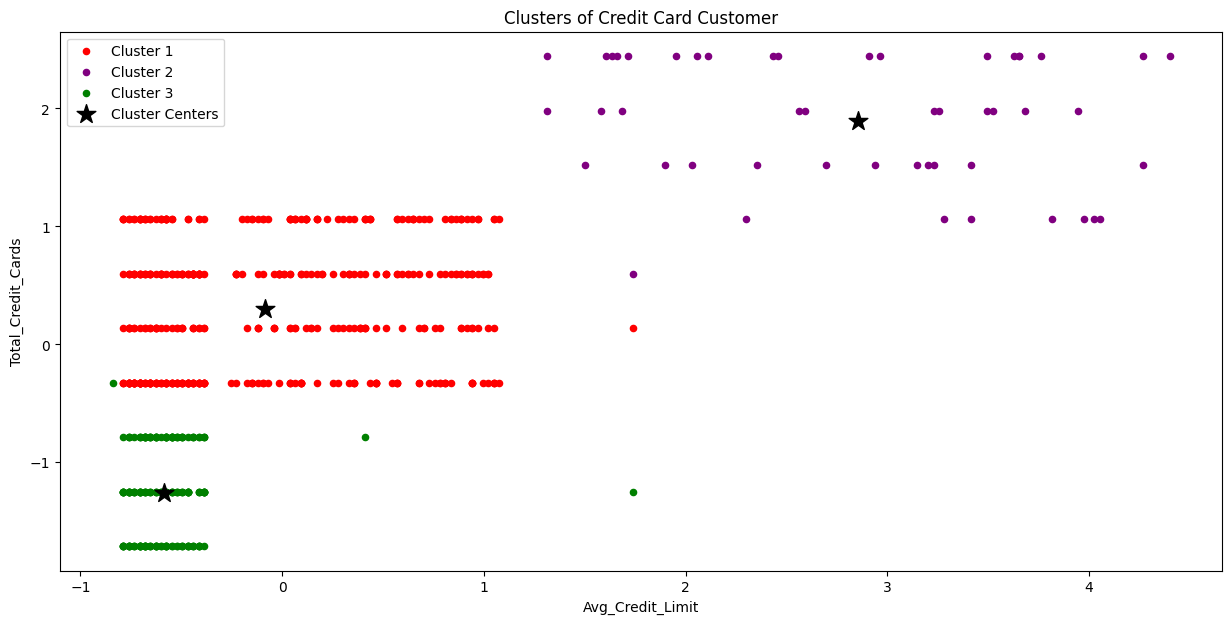

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s=20, c='purple', label='Cluster 2')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Cluster Centers', marker='*')
plt.title('Clusters of Credit Card Customer')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend(loc='best')
plt.show()

Cluster 1 (Merah) = customer yang memiliki total credit dan rata-rata limit menengah

Cluster 2 (ungu) = customer yang memiliki total credit dan rata-rata limit yang paling rendah

Cluster 3 (Hijau) = customer yang memiliki total credit card dan rata-rata limit yang paling tinggi

In [17]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,1
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1


In [20]:
import numpy as np

cluster_counts = np.bincount(pred)
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i+1}: {count} data points")

Cluster 1: 434 data points
Cluster 2: 49 data points
Cluster 3: 177 data points
